In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from copy import deepcopy
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)




In [5]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")



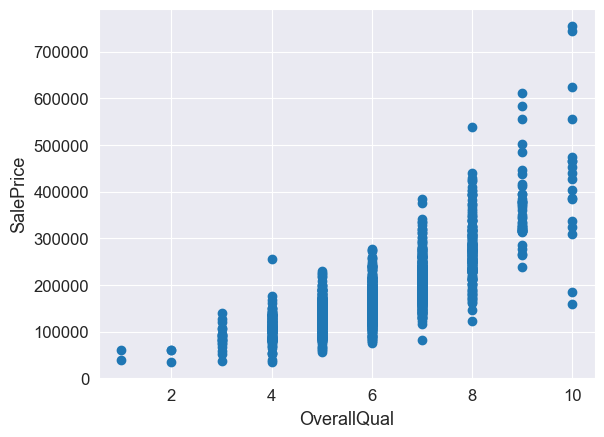

In [6]:
fig, ax = plt.subplots()
ax.scatter(train['OverallQual'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

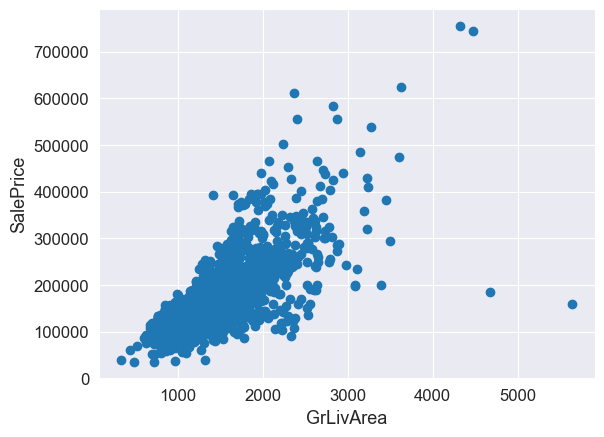

In [7]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()




In [8]:
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)
train = train.drop(train[(train.GarageArea>1200) & (train.SalePrice<165000)].index)
train = train.drop(train[(train.TotRmsAbvGrd==10) & (train.SalePrice>700000)].index)
train = train.drop(train[(train.YearBuilt<1900) & (train.SalePrice>250000)].index)
train = train.drop(train[(train.YearBuilt>2000) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.YearRemodAdd<1970) & (train.SalePrice>350000)].index)
train = train.drop(train[(train.MasVnrArea>=1400) & (train.SalePrice<250000)].index)
train = train.drop(train[(train.GarageYrBlt<1960) & (train.SalePrice>340000)].index)
train = train.drop(train[(train.LotFrontage>150) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.GarageFinish.isin([1,2])) & (train.SalePrice>470000)].index)
train = train.drop(train[(train.KitchenQual==2) & (train.SalePrice>600000)].index)
train = train.drop(train[(train.KitchenQual==3) & (train.SalePrice>360000)].index)
train = train.drop(train[(train.ExterQual==2) & (train.SalePrice>550000)].index)
train.reset_index(drop=True, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 179579.32 and sigma = 75859.18



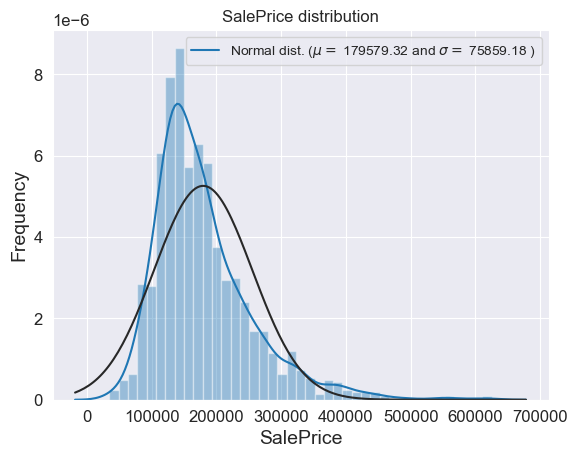

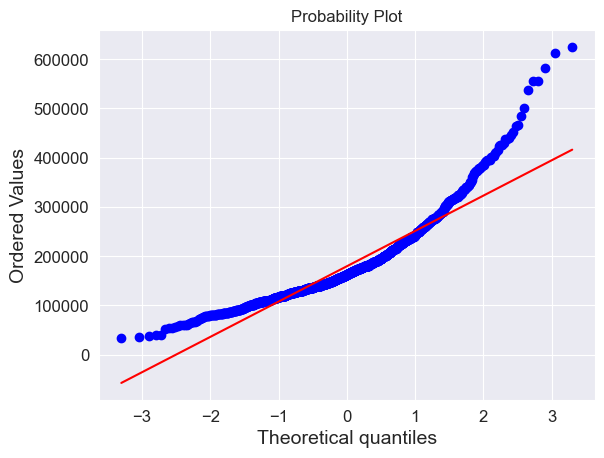

In [9]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.39



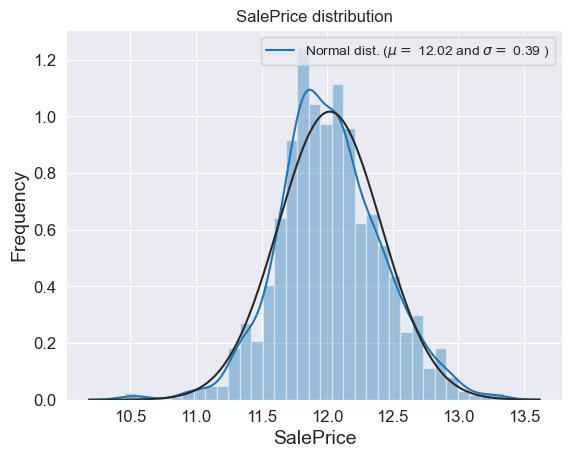

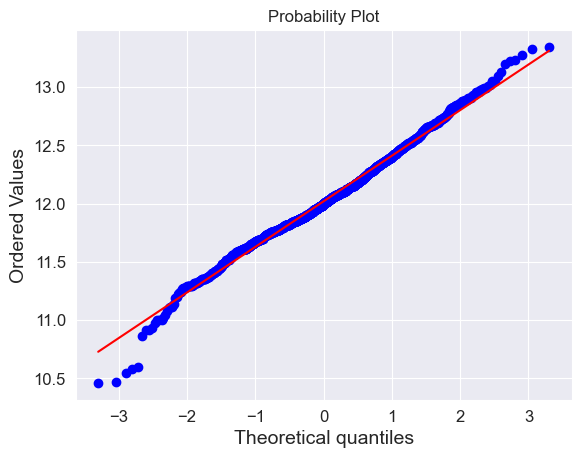

In [10]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [11]:

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
train_data = pd.concat((train, test)).reset_index(drop=True)
train_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(train_data.shape))

all_data size is : (2904, 79)


# Feature enginnering / Data Cleaning & Manipulation

### Detecting Nans and solving them 

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2904 non-null   int64  
 1   MSZoning       2900 non-null   object 
 2   LotFrontage    2419 non-null   float64
 3   LotArea        2904 non-null   int64  
 4   Street         2904 non-null   object 
 5   Alley          195 non-null    object 
 6   LotShape       2904 non-null   object 
 7   LandContour    2904 non-null   object 
 8   Utilities      2902 non-null   object 
 9   LotConfig      2904 non-null   object 
 10  LandSlope      2904 non-null   object 
 11  Neighborhood   2904 non-null   object 
 12  Condition1     2904 non-null   object 
 13  Condition2     2904 non-null   object 
 14  BldgType       2904 non-null   object 
 15  HouseStyle     2904 non-null   object 
 16  OverallQual    2904 non-null   int64  
 17  OverallCond    2904 non-null   int64  
 18  YearBuil

In [13]:
train_data.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       485
LotArea             0
Street              0
Alley            2709
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [14]:
train_data['TotalBsmtSF'].fillna(0,inplace=True)
train_data['BsmtFinSF1'].fillna(0,inplace=True)
train_data['BsmtFinSF2'].fillna(0,inplace=True)
train_data['BsmtUnfSF'].fillna(0,inplace=True)
train_data.drop('Utilities',axis=1,inplace=True)
train_data['Functional'].fillna('Unknown',inplace=True)
train_data['BsmtFullBath'].fillna(0,inplace=True)
train_data['BsmtHalfBath'].fillna(0,inplace=True)
train_data['SaleType'].fillna('Unknown',inplace=True)
train_data['MSZoning'].fillna('Unknown',inplace=True)
train_data['FireplaceQu'].fillna('Non-Existant',inplace = True)
train_data['GarageArea'].fillna(0,inplace=True)
train_data['Electrical'].fillna('SBrkr' ,inplace=True)
train_data['MasVnrType'].fillna('Unknown',inplace=True)
train_data['MasVnrArea'].fillna(0 ,inplace=True)
train_data['GarageCars'].fillna(0 ,inplace=True)
train_data['KitchenQual'].fillna('Unknown' ,inplace=True)

In [15]:
train_data['GarageType'].fillna(train_data['GarageType'].mode()[0],inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0],inplace=True)
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0],inplace=True)
train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0],inplace=True)
train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0],inplace=True)

In [16]:
import numpy as np
import pandas as pd

def EMF(x):
    bins = [0, 1, 320, 480, 576, 1418]
    labels = ['None', '1Q', '2Q', '3Q', '4Q']
    if np.isscalar(x):
        binned = pd.cut(np.array([x]), bins, labels=labels, include_lowest=True)
        return binned[0]
    else:
        binned = pd.cut(x, bins, labels=labels, include_lowest=True)
        return binned

mode_values3 = train_data.groupby(train_data['GarageArea'].apply(EMF))['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'None')
mode_values3.reset_index(inplace=True)

mode_values3

C:\Users\Omar Muhammed\AppData\Local\Temp\ipykernel_19716\3185028418.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mode_values3 = train_data.groupby(train_data['GarageArea'].apply(EMF))['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'None')


,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,1Q,Detchd,1950.0,Unf,TA,TA
1,2Q,Attchd,2005.0,Unf,TA,TA
2,3Q,Attchd,2005.0,Unf,TA,TA
3,4Q,Attchd,2006.0,Fin,TA,TA
4,None,Attchd,2005.0,Unf,TA,TA


In [17]:
def fill_nan3(x, mode_value, column_guide, column_nan):
    

    for index , row in x.iterrows():
        
        if row[column_nan] == x[column_nan].mode()[0] :
            
            emf = EMF(row[column_guide])
            
            if emf in mode_value[column_guide].values:
                
                train_data.loc[index,column_nan] = mode_value.loc[mode_value[column_guide] == emf , column_nan].values[0]
            

fill_nan3(train_data,mode_values3,'GarageArea','GarageType') 
fill_nan3(train_data,mode_values3,'GarageArea','GarageYrBlt')
fill_nan3(train_data,mode_values3,'GarageArea','GarageFinish')
fill_nan3(train_data,mode_values3,'GarageArea','GarageQual')
fill_nan3(train_data,mode_values3,'GarageArea','GarageCond')

In [18]:
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0] ,inplace=True)
train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0],inplace=True)
train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0] ,inplace=True)
train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0] ,inplace=True)
train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0] ,inplace=True)

In [19]:
import numpy as np
import pandas as pd

def discretize_total_bsmt_sf(x):
    bins = [0 , 1 , 790, 990, 1300, 6000]
    labels = ['None', '1Q', '2Q', '3Q', '4Q']
    if np.isscalar(x):
        binned = pd.cut(np.array([x]), bins, labels=labels, include_lowest=True)
        return binned[0]
    else:
        binned = pd.cut(x, bins, labels=labels, include_lowest=True)
        return binned

mode_values = train_data.groupby(train_data['TotalBsmtSF'].apply(discretize_total_bsmt_sf))['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Non_existant')
mode_values.reset_index(inplace=True)


fill_nan3(train_data, mode_values, 'TotalBsmtSF', 'BsmtQual')
fill_nan3(train_data, mode_values, 'TotalBsmtSF', 'BsmtCond')
fill_nan3(train_data, mode_values, 'TotalBsmtSF', 'BsmtExposure')
fill_nan3(train_data, mode_values, 'TotalBsmtSF', 'BsmtFinType1')
fill_nan3(train_data, mode_values, 'TotalBsmtSF', 'BsmtFinType2')


C:\Users\Omar Muhammed\AppData\Local\Temp\ipykernel_19716\3637105674.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mode_values = train_data.groupby(train_data['TotalBsmtSF'].apply(discretize_total_bsmt_sf))['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Non_existant')


In [20]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median() ,inplace=True)
train_data['Alley'].fillna(train_data['Alley'].mode()[0],inplace=True)
train_data['MiscFeature'].fillna(train_data['MiscFeature'].mode()[0] ,inplace=True)
train_data['Fence'].fillna(train_data['Fence'].mode()[0] ,inplace=True)

In [21]:
mode_values1 = pd.DataFrame(train_data.groupby(train_data['Neighborhood'])['LotFrontage'].agg(lambda x: x.median() if not x.mode().empty else 'Unknown'))
mode_values1['Alley'] = train_data.groupby(train_data['Neighborhood'])['Alley'].agg(lambda x: x.mode() if not x.mode().empty else 'Unknown')
mode_values1['MiscFeature'] =  train_data.groupby('Neighborhood')['MiscFeature'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown')
mode_values1['Fence'] = train_data.groupby('Neighborhood')['Fence'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown')
mode_values1.reset_index(inplace=True) 
mode_values1

,Neighborhood,LotFrontage,Alley,MiscFeature,Fence
0,Blmngtn,53.0,Grvl,Shed,MnPrv
1,Blueste,24.0,Grvl,Shed,GdPrv
2,BrDale,21.0,Grvl,Shed,MnPrv
3,BrkSide,52.0,Grvl,Shed,MnPrv
4,ClearCr,68.0,Grvl,Shed,MnPrv
5,CollgCr,68.0,Grvl,Shed,MnPrv
6,Crawfor,68.0,Grvl,Shed,MnPrv
7,Edwards,66.5,Grvl,Shed,MnPrv
8,Gilbert,68.0,Grvl,Shed,MnPrv
9,IDOTRR,60.0,Grvl,Shed,MnPrv


In [22]:
mode_values1 = pd.DataFrame(train_data.groupby(train_data['Neighborhood'])['LotFrontage'].agg(lambda x: x.median() if not x.mode().empty else 'Unknown'))
mode_values1.reset_index(inplace=True) 
mode_values1
def fill_Nans2(df, mode_value , column_guide, column_nans):
    
    
    for index, row in df.iterrows():
        
        
        if row[column_nans] == df[column_guide].mode()[0] and row[column_guide] in mode_value[column_guide].values:
            
            df.loc[index, column_nans] = mode_value.loc[mode_value[column_guide] == row[column_guide], column_nans].values[0]
            
        elif pd.isna(row[column_nans]) and row[column_guide] in mode_value[column_guide].values :
            
            df.loc[index, column_nans] = mode_value.loc[mode_value[column_guide] == row[column_guide], column_nans].values[0]

fill_Nans2(train_data, mode_values1,  'Neighborhood', 'LotFrontage')


In [23]:
def fill_Nans2(df, mode_value , column_guide, column_nans):
    
    
    for index, row in df.iterrows():
        
        
        if row[column_nans] == df[column_guide].mode()[0] and row[column_guide] in mode_value[column_guide].values:
            
            df.loc[index, column_nans] = mode_value.loc[mode_value[column_guide] == row[column_guide], column_nans].values[0]
            
        elif pd.isna(row[column_nans]) and row[column_guide] in mode_value[column_guide].values :
            
            df.loc[index, column_nans] = mode_value.loc[mode_value[column_guide] == row[column_guide], column_nans].values[0]

fill_Nans2(train_data, mode_values1,  'Neighborhood', 'LotFrontage')
fill_Nans2(train_data, mode_values1, 'Neighborhood', 'Alley')
fill_Nans2(train_data, mode_values1, 'Neighborhood','Fence')
fill_Nans2(train_data, mode_values1, 'Neighborhood', 'MiscFeature')

In [24]:
def pool_area_range(pool_area):
    if pool_area == 0:
        return 'No Pool'
    elif pool_area <= 300:
        return 'Small'
    elif pool_area <= 600:
        return 'Medium'
    else:
        return 'Large'
                
mode_values2 = train_data.groupby(train_data['PoolArea'].apply(pool_area_range))['PoolQC'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'NoPool')

mode_values2

PoolArea
Large          Gd
Medium         Ex
No Pool    NoPool
Small          Ex
Name: PoolQC, dtype: object

In [25]:
def fill_poolqc(df, mode_values):
    for index, row in df.iterrows():
        if pd.isna(row['PoolQC']):
            pool_area_category = pool_area_range(row['PoolArea'])
            if pool_area_category in mode_values:
                df.at[index, 'PoolQC'] = mode_values[pool_area_category]
                
fill_poolqc(train_data,mode_values2)                

In [26]:
modi = train_data.groupby(train_data['ExterQual'])['Exterior1st','Exterior2nd'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Non_existant')
modi.reset_index(inplace=True)
fill_Nans2(train_data,modi,'ExterQual','Exterior1st')
fill_Nans2(train_data,modi,'ExterQual','Exterior2nd')

C:\Users\Omar Muhammed\AppData\Local\Temp\ipykernel_19716\2406559139.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  modi = train_data.groupby(train_data['ExterQual'])['Exterior1st','Exterior2nd'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else 'Non_existant')


In [27]:
import pandas as pd

# Assuming train_data is your DataFrame
data_types = train_data.applymap(type)

mixed_columns = []

for column in data_types.columns:
    unique_types = data_types[column].nunique()
    if unique_types > 1:
        mixed_columns.append(column)

print("Columns with mixed data types:", mixed_columns)

Columns with mixed data types: []


In [28]:
train_data['MSSubClass'] = train_data['MSSubClass'].apply(str)
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].astype(str)
train_data['YrSold'] = train_data['YrSold'].astype(str)
train_data['MoSold'] = train_data['MoSold'].astype(str)

In [29]:

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_data[c].values)) 
    train_data[c] = lbl.transform(list(train_data[c].values))
    
    
print('Shape all_data: {}'.format(train_data.shape))

Shape all_data: (2904, 78)


## Feature engineering and data manpulation 

In [30]:
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']


In [31]:
train_dfx = train_data

In [32]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Check the skew of all numerical features
skewed_feats = train_dfx[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
MiscVal,21.900451
PoolArea,18.666208
LowQualFinSF,12.383852
3SsnPorch,11.346145
LotArea,10.546134
KitchenAbvGr,4.289456
BsmtFinSF2,4.150495
EnclosedPorch,4.001984
ScreenPorch,3.936007
BsmtHalfBath,3.934066


In [33]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import numpy as np
from scipy.special import boxcox1p
from scipy.stats import skew
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

def boxcox_transform(X, lam):
    X_transformed = X.copy()
    numeric_feats = X_transformed.dtypes[X_transformed.dtypes != "object"].index
    skewed_feats = X_transformed[numeric_feats].apply(lambda x: skew(x.dropna()))
    skewed_feats = skewed_feats[skewed_feats > 0.75]
    skewed_features = skewed_feats.index
    
    for feat in skewed_features:
        min_val = X_transformed[feat].min()
        if min_val <= 0:
            X_transformed[feat] += abs(min_val) + 1
        X_transformed[feat] = boxcox1p(X_transformed[feat], lam)
        
    X_transformed = pd.get_dummies(X_transformed)      
 
    return X_transformed


def evaluate_lambda(lam, X, y):
    X_encoded = boxcox_transform(X, lam)    
    lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
    cv = KFold(n_splits=5, shuffle=True, random_state=42).get_n_splits(train.values)
    scores = cross_val_score(lasso, X_encoded.values, y, cv=cv, scoring='neg_mean_squared_error')
    return np.sqrt(-scores.mean())

train = train_dfx[:ntrain]

lambdas = np.arange(0, 2 , 0.01)
scores = []

for lam in lambdas:
    score = evaluate_lambda(lam, train, y_train)
    scores.append(score)

best_lam = lambdas[np.argmin(scores)]
print(f"Best lambda value: {best_lam}")

print("Scores for the first 10 lambda values:", scores[:10])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.404e-02, tolerance: 1.711e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.840e-02, tolerance: 1.711e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.530e-02, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.189e-01, tolerance: 1.763e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.713e-01, tolerance: 1.802e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e-01, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.817e+00, tolerance: 1.816e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.546e+00, tolerance: 1.798e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.855e+00, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+00, tolerance: 1.798e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+00, tolerance: 1.763e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e+00, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.411e+00, tolerance: 1.711e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.799e+00, tolerance: 1.816e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+00, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.352e-01, tolerance: 1.763e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.855e-02, tolerance: 1.802e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.492e-01, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+00, tolerance: 1.798e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+00, tolerance: 1.763e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.140e+00, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.550e+00, tolerance: 1.798e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.349e+00, tolerance: 1.763e-02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.192e+00, toleranc

Best lambda value: 0.02
Scores for the first 10 lambda values: [0.10763924631954006, 0.10763843439949806, 0.10763802131217591, 0.10763813773510955, 0.10763959208028745, 0.10764185559279112, 0.1076446804480612, 0.10764787642054732, 0.10765089958195234, 0.10765408068573784]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.983e+00, tolerance: 1.816e-02
  model = cd_fast.enet_coordinate_descent(


In [34]:
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = best_lam
for feat in skewed_features:
    train_dfx[feat] = boxcox1p(train_dfx[feat], lam)

There are 33 skewed numerical features to Box Cox transform


In [35]:
train_dfx = pd.get_dummies(train_dfx)
train_dfy = y_train
train = train_dfx[:ntrain]
test = train_dfx[ntrain:]


## Lasso, ElasticNet,KernelRidge,GradientBoostingRegressor

In [36]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)



# SVR

In [43]:
from scipy.stats import loguniform 

x_train ,x_test ,y_train , y_test = train_test_split(train,train_dfy,test_size=0.2,random_state=42)

from sklearn.metrics import make_scorer

def rmse_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return -rmse  # Use negative value since greater is better for scorers

rmse_scoring = make_scorer(rmse_scorer)


full_pipeline = Pipeline([
    ('svr' , SVR())
])


Parms = {
    'svr__kernel': [ 'linear', 'rbf' ,'poly'],
    'svr__C': loguniform(0.001, 10),
    'svr__epsilon': reciprocal(0.0001, 0.5),
    'svr__gamma': reciprocal(0.001, 1)
}
 

rnd_search = RandomizedSearchCV(
    full_pipeline, Parms, n_iter= 20 , cv=5, random_state=42, n_jobs=-1, scoring="neg_mean_squared_error", verbose=3,
)

rndx = rnd_search.fit(x_train, y_train)


pred_train = rndx.predict(x_train)
mse = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse)

pred_test = rndx.predict(x_test)
mse = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse)


best_rmse = -rnd_search.best_score_

print('Train set RMSE:', rmse_train)
print('Test set RMSE:', rmse_test)
print('best_rmse:', best_rmse) 

cleaned_best_params = {key.replace("svr__", ""): value for key, value in rndx.best_params_.items()}
print("Cleaned best parameters:\n", cleaned_best_params)

SVR_M = SVR(**cleaned_best_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Train set RMSE: 0.09420597916074679
Test set RMSE: 0.12802155716814165
best_rmse: 0.01272979450789854
Cleaned best parameters:
 {'C': 0.050190728339613154, 'epsilon': 0.0005877193283381313, 'gamma': 0.05047786565710605, 'kernel': 'linear'}


In [40]:
ada = AdaBoostRegressor(SVR() , n_estimators=200,learning_rate=0.05, random_state=42)

full_pipeline = Pipeline([
    ('RFR', ada)
])

Parms = {
    'RFR__base_estimator__kernel': [ 'linear','poly', 'rbf'],
    'RFR__base_estimator__C': loguniform(0.00001, 100.0),
    'RFR__base_estimator__degree': randint(1, 10),
    'RFR__base_estimator__gamma': reciprocal(0.0001, 1),
    'RFR__base_estimator__coef0': uniform(-1, 1)
}

rnd_search = RandomizedSearchCV(
    full_pipeline, Parms, n_iter=5, cv=5, random_state=42, n_jobs=-1, scoring=rmse_scoring, verbose=3,
)

rndx_ada = rnd_search.fit(x_train, y_train)


pred_train = rndx.predict(x_train)
mse = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse)

pred_test = rndx.predict(x_test)
mse = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse)


best_rmse = -rnd_search.best_score_

print('Train set RMSE:', rmse_train)
print('Test set RMSE:', rmse_test)
print('best_rmse RMSE:', best_rmse) 

cleaned_best_params = {key.replace("RFR__base_estimator__", ""): value for key, value in rndx_ada.best_params_.items()}
print("Cleaned best parameters:\n", cleaned_best_params)

Ada_SVR_M = SVR(**cleaned_best_params)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train set RMSE: 0.09912079407826327
Test set RMSE: 0.13469649786474525
best_rmse RMSE: 0.1254697697146937
Cleaned best parameters:
 {'C': 0.006295450333384249, 'coef0': -0.9533343367863846, 'degree': 3, 'gamma': 0.0033872555658521473, 'kernel': 'linear'}


#  RANDOMFORESTREGRESSOR (RFR)

In [38]:
full_pipeline = Pipeline([
    ('RFR', RandomForestRegressor(random_state=42,n_jobs=-1))
])


prams = {
    
    
    "RFR__max_features": uniform(0.1, 0.9),
    "RFR__n_estimators": randint(100, 1000),
    "RFR__max_depth": randint(10,50),
    "RFR__min_samples_split":randint(2,20)
 }
     

rnd_search = RandomizedSearchCV(full_pipeline , prams , n_iter=50, cv=3 , random_state=42 , n_jobs=-1)  

rndx_rtree = rnd_search.fit(x_train, y_train)
pred_train = rndx_rtree.predict(x_train)
mse = mean_squared_error( y_train , pred_train)
rmse = np.sqrt(mse)

print('the result of the train set :', rmse)

predTREE_test = rndx_rtree.predict(x_test)
msei = mean_squared_error(y_test , predTREE_test)
rmsei = np.sqrt(msei)

print('the result of the test set :', rmsei)

cleaned_best_params = {key.replace("RFR__", ""): value for key, value in rndx_rtree.best_params_.items()}
print("Cleaned best parameters:\n", cleaned_best_params)

RFR = RandomForestRegressor(**cleaned_best_params)


the result of the train set : 0.04922039138972821
the result of the test set : 0.15495801672455772
Cleaned best parameters:
 {'max_depth': 21, 'max_features': 0.3266040662428278, 'min_samples_split': 3, 'n_estimators': 486}


# IMPLEMENT ADABOOST AND RFRTREE IN A STACKING CLASSIFIER 

In [45]:
stk_reg = StackingRegressor(estimators=[('rndx_svr', rndx.best_estimator_),
                                       ('rndx_rtree',rndx_rtree.best_estimator_),
                                       ('ESNet', ENet),
                                        ('KRR',KRR),
                                        ('GBoost',GBoost)
                                       ],
                           final_estimator= lasso ,
                           cv=5)


In [46]:
n_folds = 5

def rmsle_cv(model, x):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x)
    rmse= np.sqrt(-cross_val_score(model, x, train_dfy, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

score = rmsle_cv(lasso, train)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet, train)
print("\nENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR, train)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost, train)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(SVR_M, train)
print("\nSVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(RFR, train)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(stk_reg, train)
print("\nStackingRegressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1086 (0.0078)


ENet score: 0.1087 (0.0078)


KRR score: 0.1152 (0.0076)


GBoost score: 0.1152 (0.0075)


SVR score: 0.1152 (0.0109)


Random Forest score: 0.1291 (0.0061)


StackingRegressor score: 0.1063 (0.0074)



In [47]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

std_scaler=StandardScaler()
rbst_scaler=RobustScaler()

X_std=std_scaler.fit_transform(train)

X_train,X_test,y_train,y_test=train_test_split(X_std,train_dfy,test_size=0.002,random_state=52)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
y_head=lgb_regressor.predict(X_test)
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

X_train Shape : (1442, 333)
X_test Shape : (3, 333)
y_train Shape : (1442,)
y_test Shape : (3,)
[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
----------LGBM----------
R square Accuracy:  0.9430031032954395
Mean Absolute Error Accuracy:  0.03174202949451773
Mean Squared Error Accuracy:  0.001344621358435068


In [ ]:

Lasso score: 0.1101 (0.0066)


ENet score: 0.1102 (0.0066)


KRR score: 0.1224 (0.0070)


GBoost score: 0.1161 (0.0077)


SVR score: 0.1164 (0.0071)
    
SVR: 0.1087 (0.0157) for the gir